# Linear Regression
### Age at Start & Lifetime Length of Stay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# show all columns
pd.set_option('display.max_columns', None)

from mlxtend.plotting import scatterplotmatrix, heatmap

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_33927/189204939.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import utils

In [4]:
included_subset = pd.read_csv("no_null_data_subset.csv")

In [32]:
# move LifeLOS to the end
cols = included_subset.columns.tolist()
cols.remove('LifeLOS')
cols.append('LifeLOS')
included_subset = included_subset[cols]

In [33]:
included_subset

,DataYear,RecNumbr,CLINDIS,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,LatRemLOS,SettingLOS,PreviousLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,State,FIPSCode,Sex,AgeAdopt,removalManner,currentPlacementSetting,OutOfStatePlacement,caseGoal,caretakerFamilyStructure,fosterFamilyStructure,dischargeReason,raceEthnicity,everAdopted,firstCaretakerAge,secondCaretakerAge,firstFosterCaretakerAge,secondFosterCaretakerAge,age2021,Race,LifeLOS
0,2002,94281,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,423.0,2.0,2.0,1422.0,15.0,15.0,15.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,13 years or older,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Unmarried couple,Married couple,"Reunified with parent, primary caretaker","NH, Black","Yes, child has been legally adopted",35.0,65.0,72.0,77.0,35.0,2.0,1424.0
1,2002,163424,1.0,0.0,0.0,0.0,1.0,0.0,2.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2548.0,216.0,235.0,8.0,1.0,8.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, relative",No,Live with other relative(s),Unmarried couple,Married couple,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",36.0,38.0,45.0,40.0,28.0,1.0,2783.0
2,2002,209716,2.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,446.0,1192.0,957.0,3.0,10.0,8.0,11.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,"Jefferson, AL",Male,Unknown,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Unmarried couple,Married couple,"Reunified with parent, primary caretaker","Non-Hispanic (NH), White","No, has never been legally adopted",37.0,39.0,38.0,37.0,31.0,1.0,1195.0
3,2002,212437,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,446.0,24.0,24.0,1.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Married couple,Married couple,Transfer to another agency,Hispanic (Any Race),"No, has never been legally adopted",33.0,37.0,46.0,46.0,24.0,99.0,25.0
4,2002,234587,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,485.0,426.0,105.0,4.0,3.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, relative",No,"Reunify with parent, principal caretaker",Married couple,Married couple,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",28.0,28.0,45.0,45.0,24.0,1.0,590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2002,E=>>==CB@F>B,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,542.0,11.0,11.0,55.0,6.0,6.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Connecticut,"Fairfield, CT",Female,Not applicable,Not yet determined,"Foster home, non-relative",No,Adoption,Single female,Married couple,"Reunified with parent, primary caretaker","NH, Black","No, has never been legally adopted",29.0,36.0,34.0,46.0,26.0,2.0,66.0
2599,2002,E=>>=>A=DB@>,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,

## Gradient Descent

In [ ]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Testing linear regression model with age at start (AgeAtStarte) and lifetime length of stay (LifeLOS)
class LinearRegressionGD(object):

    def __init__(self, eta=0.0001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [35]:
X = included_subset[['AgeAtStart']].values
y = included_subset['LifeLOS'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

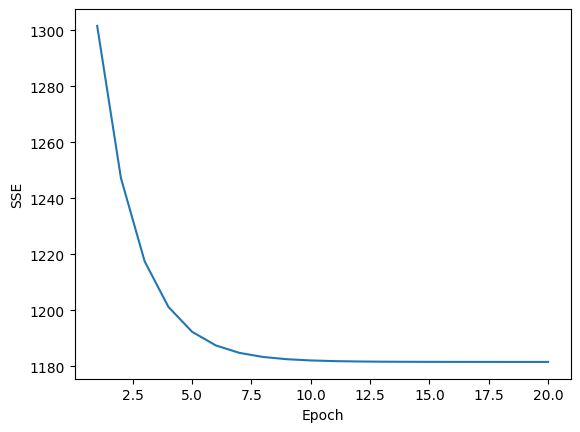

In [8]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white')
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

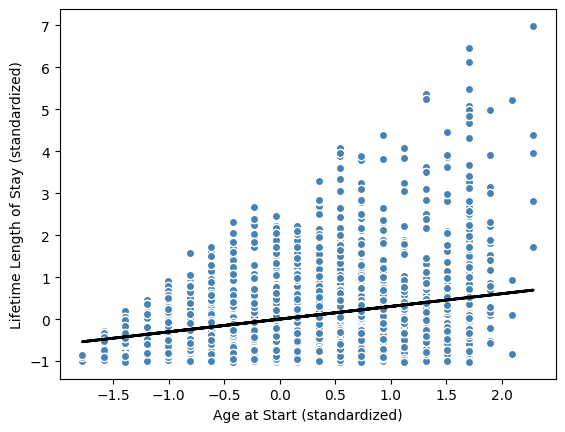

In [10]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Age at Start (standardized)')
plt.ylabel('Lifetime Length of Stay (standardized)')
plt.show()
# We can see that the model is not a good fit for the data

In [11]:
# Input age at start and get the lifetime length of stay
age = 4

age_at_start_std = sc_x.transform(np.array([[age]]))
life_los_std = lr.predict(age_at_start_std)
life_los_std = life_los_std.reshape(-1, 1)
print(f"Age at Start: {age}\nLifetime Length of Stay: {round(sc_y.inverse_transform(life_los_std)[0][0], 2)}")

Age at Start: 4
Lifetime Length of Stay: 635.92


In [12]:
# When working with standardized data, the intercept will be zero
print(f"Slope: {round(lr.w_[1], 2)}\nIntercept: {round(lr.w_[0], 2)}")

Slope: 0.3
Intercept: -0.0


## Linear Regression using Scikit-Learn

In [13]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f"Slope: {round(slr.coef_[0], 2)}\nIntercept: {round(slr.intercept_, 2)}")

Slope: 48.16
Intercept: 442.79


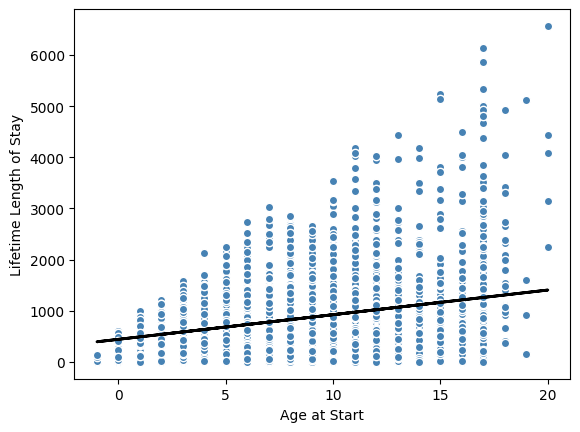

In [14]:
lin_regplot(X, y, slr)
plt.xlabel('Age at Start')
plt.ylabel('Lifetime Length of Stay')
plt.show()

## Robust Regression using RANSAC
Gets rid of outliers

In [15]:
from sklearn.linear_model import RANSACRegressor

In [25]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=500.0, 
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=500.0)

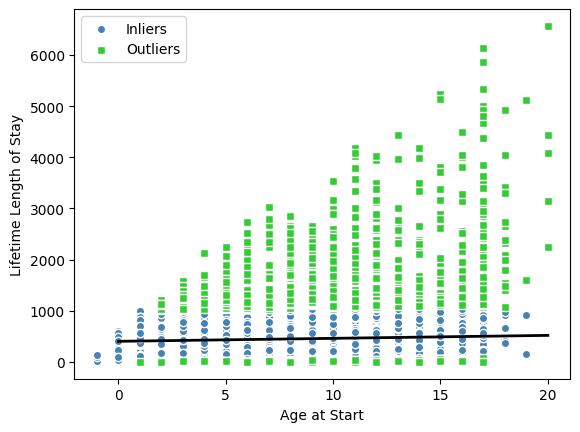

In [26]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 21, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Age at Start')
plt.ylabel('Lifetime Length of Stay')
plt.legend(loc='upper left')
plt.show()

In [27]:
print(f"Slope: {round(ransac.estimator_.coef_[0], 2)}\nIntercept: {round(ransac.estimator_.intercept_, 2)}")

Slope: 5.8
Intercept: 403.8


## Evaluating performance of the models

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
included_subset.head()

,DataYear,RecNumbr,CLINDIS,MR,VISHEAR,PHYDIS,DSMIII,OTHERMED,TOTALREM,NUMPLEP,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,LatRemLOS,SettingLOS,PreviousLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,State,FIPSCode,Sex,AgeAdopt,removalManner,currentPlacementSetting,OutOfStatePlacement,caseGoal,caretakerFamilyStructure,fosterFamilyStructure,dischargeReason,raceEthnicity,everAdopted,firstCaretakerAge,secondCaretakerAge,firstFosterCaretakerAge,secondFosterCaretakerAge,age2021,Race,LifeLOS
0,2002,94281,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,423.0,2.0,2.0,1422.0,15.0,15.0,15.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,13 years or older,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Unmarried couple,Married couple,"Reunified with parent, primary caretaker","NH, Black","Yes, child has been legally adopted",35.0,65.0,72.0,77.0,35.0,2.0,1424.0
1,2002,163424,1.0,0.0,0.0,0.0,1.0,0.0,2.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2548.0,216.0,235.0,8.0,1.0,8.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, relative",No,Live with other relative(s),Unmarried couple,Married couple,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",36.0,38.0,45.0,40.0,28.0,1.0,2783.0
2,2002,209716,2.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,446.0,1192.0,957.0,3.0,10.0,8.0,11.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,"Jefferson, AL",Male,Unknown,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Unmarried couple,Married couple,"Reunified with parent, primary caretaker","Non-Hispanic (NH), White","No, has never been legally adopted",37.0,39.0,38.0,37.0,31.0,1.0,1195.0
3,2002,212437,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,446.0,24.0,24.0,1.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Female,Unknown,Court ordered,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Married couple,Married couple,Transfer to another agency,Hispanic (Any Race),"No, has never been legally adopted",33.0,37.0,46.0,46.0,24.0,99.0,25.0
4,2002,234587,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,485.0,426.0,105.0,4.0,3.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Alabama,Fewer than 1000 cases in the County,Male,Unknown,Court ordered,"Foster home, relative",No,"Reunify with parent, principal caretaker",Married couple,Married couple,Living with other relative(s),"Non-Hispanic (NH), White","No, has never been legally adopted",28.0,28.0,45.0,45.0,24.0,1.0,590.0


In [42]:
X = included_subset[['AgeAtStart', 'firstCaretakerAge', 'secondCaretakerAge']].values
y = included_subset['LifeLOS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [47]:
y_train_pred

array([ 931.82667763,  624.20569245,  606.07800935, ...,  967.18809484,
       1035.77661239,  576.23559347])

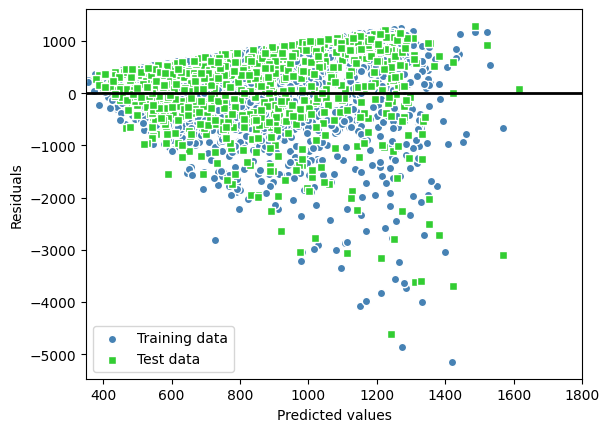

In [59]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=0, xmax=1800, color='black', lw=2)
plt.xlim([350, 1800])
plt.show()

### Calculate Mean Squared Error (MSE)

In [60]:
from sklearn.metrics import mean_squared_error

In [62]:
print(f"MSE train: {round(mean_squared_error(y_train, y_train_pred), 2)}\nMSE Test: {round(mean_squared_error(y_test, y_test_pred), 2)}")

MSE train: 609007.41
Test: 605202.29


### Calculate R-squared

In [63]:
from sklearn.metrics import r2_score
print(f"R^2 train: {round(r2_score(y_train, y_train_pred), 2)}\nR^2 test: {round(r2_score(y_test, y_test_pred), 2)}")

R^2 train: 0.1
R^2 test: 0.08


### Ridge Regression
<!-- 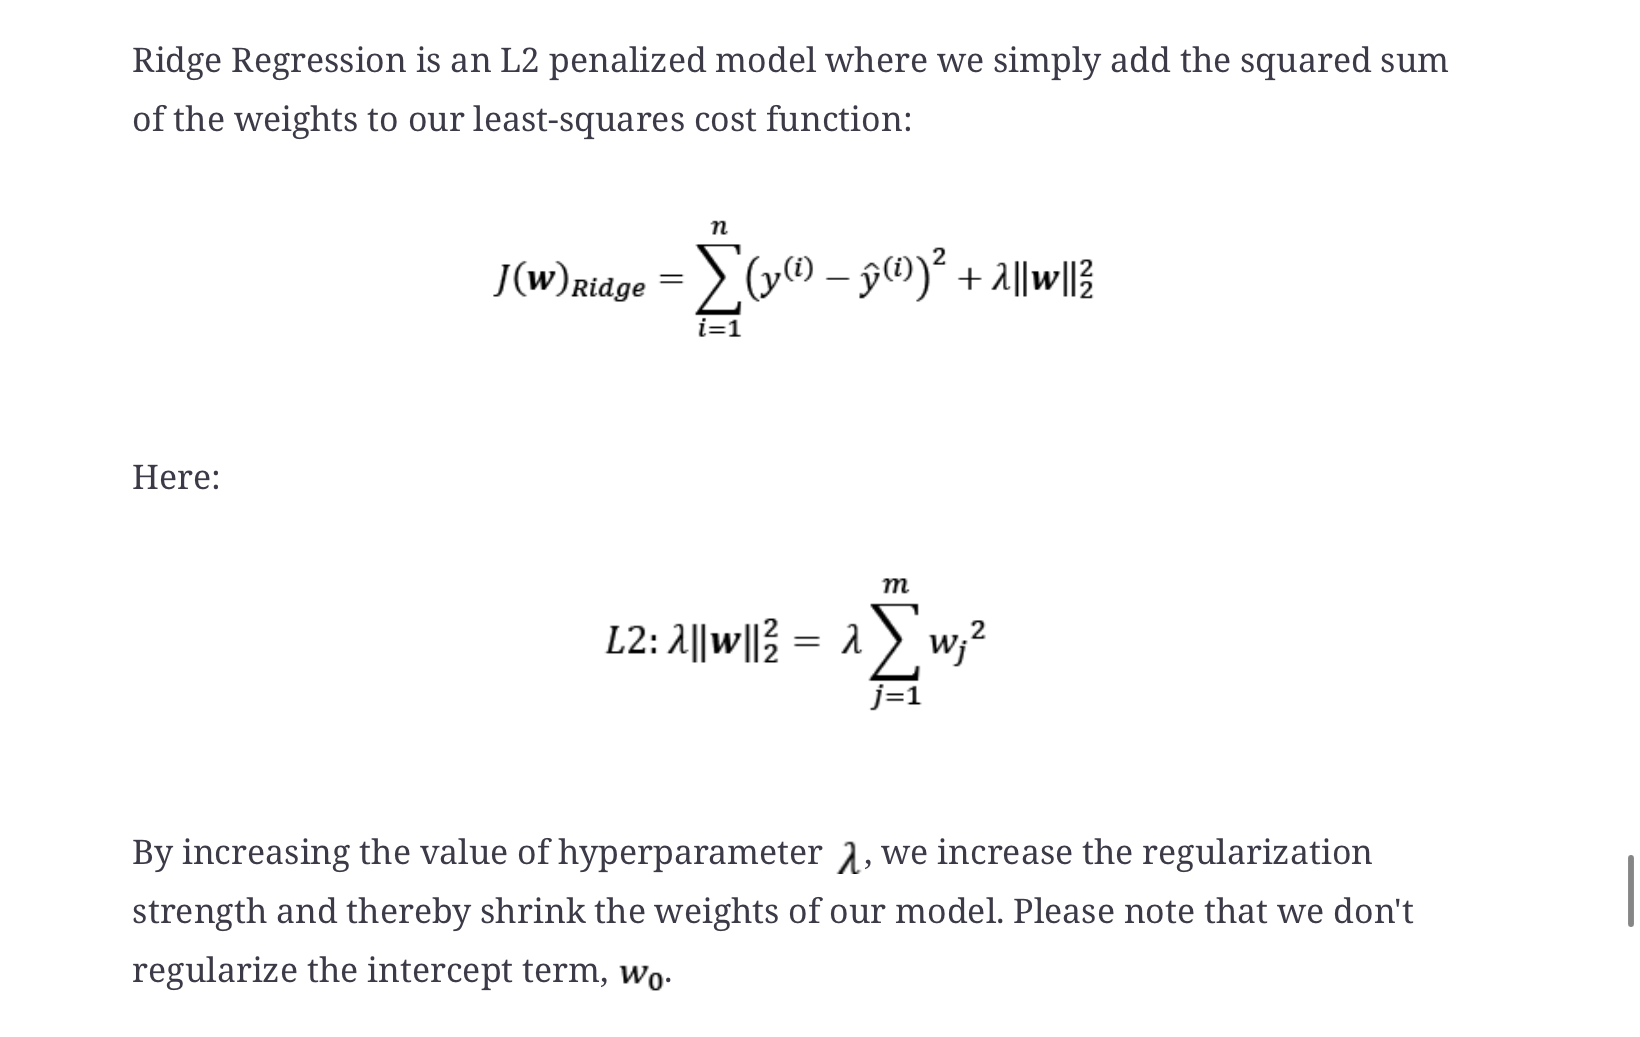 -->

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

### LASSO Regression

In [65]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

### Elastic Net Regression

In [66]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

### Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures

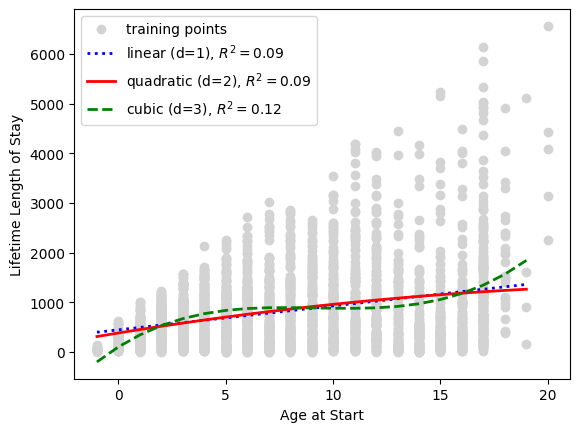

In [73]:
X = included_subset[['AgeAtStart']].values
y = included_subset['LifeLOS'].values
regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label=f'linear (d=1), $R^2={round(linear_r2, 2)}$', color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label=f'quadratic (d=2), $R^2={round(quadratic_r2, 2)}$', color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label=f'cubic (d=3), $R^2={round(cubic_r2, 2)}$', color='green', lw=2, linestyle='--')
plt.xlabel('Age at Start')
plt.ylabel('Lifetime Length of Stay')
plt.legend(loc='upper left')
plt.show()

### Transformation

In [74]:
# Transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label=f'linear (d=1), $R^2={round(linear_r2, 2)}$', color='blue', lw=2)
plt.xlabel('log(Age at Start)')
plt.ylabel('sqrt(Lifetime Length of Stay)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_33927/2906829103.py:2: RuntimeWarning: divide by zero encountered in log
  X_log = np.log(X)
/var/folders/x4/dl28z_rx30n4bp144tvcf38m0000gn/T/ipykernel_33927/2906829103.py:2: RuntimeWarning: invalid value encountered in log
  X_log = np.log(X)


ValueError: arange: cannot compute length

In [ ]:
X_log.min()-1

### Decision Trees

In [79]:
from sklearn.tree import DecisionTreeRegressor

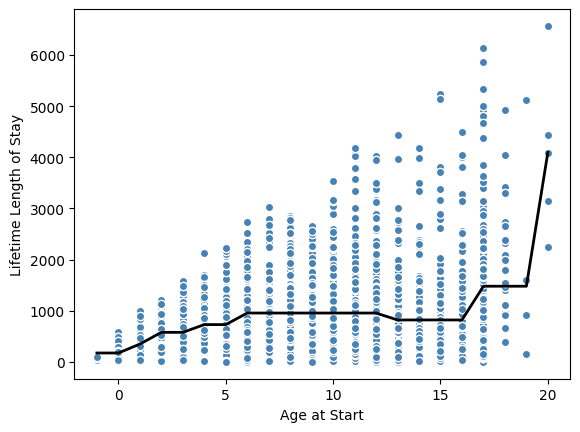

In [80]:
X = included_subset[['AgeAtStart']].values
y = included_subset['LifeLOS'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Age at Start')
plt.ylabel('Lifetime Length of Stay')
plt.show()

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
X = included_subset[['AgeAtStart', 'firstCaretakerAge', 'secondCaretakerAge']].values
y = included_subset['LifeLOS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print(f"MSE train: {round(mean_squared_error(y_train, y_train_pred), 2)}\nMSE test: {round(mean_squared_error(y_test, y_test_pred), 2)}")
print(f"R^2 train: {round(r2_score(y_train, y_train_pred), 2)}\nR^2 test: {round(r2_score(y_test, y_test_pred), 2)}")

# Data is super overfit 

MSE train: 118576.36
MSE test: 634690.52
R^2 train: 0.83
R^2 test: 0.01


### Residuals of the prediction

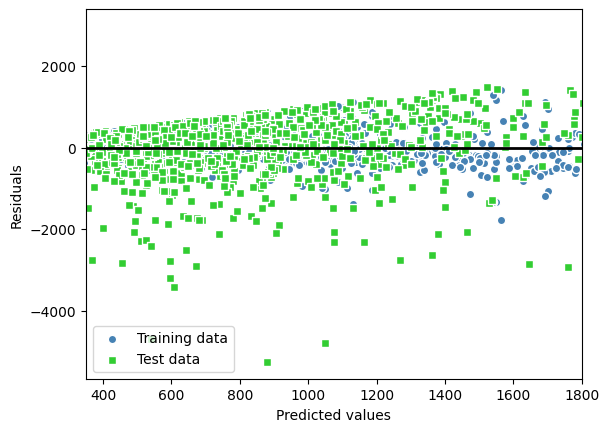

In [84]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=0, xmax=1800, color='black', lw=2)
plt.xlim([350, 1800])
plt.show()